In [1]:
%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt
import pylib.qsvt_angles as qsvt_a

8421
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

In [3]:
# ----------------------------------------------------------------------------------
# --- Read the parameters for the estimation of the QSVT angles ---
# ----------------------------------------------------------------------------------
mix.reload_module(eqsvt)

# --- Reference case: id_case_, N_coefs_ = 8, 20 ---
id_case_, N_coefs_ = 8, 20

# read estimation parameters:
dd_ = eqsvt.read_estimation(id_case_, N_coefs_)

Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case8-Nc20.hdf5
When simulated:  07/21/2024: 16:15:52
Data: for-inversion

kappa-reference: 650.000
factor-norm: 0.125
Na-ref: 23520
N-coefs-envelope-neg: 20
N-coefs-envelope-pos: 20


In [47]:
# ------------------------------------------------------------------------
# --- Target condition number for each QSVT angles should be estimated ---
# ------------------------------------------------------------------------
kappa_goal_ = int(5e5)

flag_variation_ = True

In [48]:
# --------------------------------------------------------
# --- Estimating QSVT angles ---
# --------------------------------------------------------
mix.reload_module(eqsvt)
if not flag_variation_:
    phis_appr_, coef_norm_ = eqsvt.estimate_angles(
        dd_, kappa_goal_, 
        flag_variation = False
    )
else:
    phis_appr_, coef_norm_ = \
        eqsvt.estimate_angles(
            dd_, kappa_goal_, 
            flag_variation = True,
            # ---
            N_iter_Na = 20,
            dN_env = int(kappa_goal_ / 10.),
            # ---
            N_iter_c = 0,
            coef_dc_init = 0.2
        )

--- Advanced estimation of the QSVT angles. ---
kappa-target: 5.000e+05

--- Use the variation of estimation parameters ---
N-iter: 20
dN-env: -50000

iter, Na, N-env, err:   0, 18092308, 4523077, 6.709e-04

------------------------------------------
--- Variation of Na ---
iter, Na, N-env, err:   1, 17892308, 4473077, 6.635e-04 >>> new phis
iter, Na, N-env, err:   2, 17692308, 4423077, 6.560e-04 >>> new phis
iter, Na, N-env, err:   3, 17492308, 4373077, 6.486e-04 >>> new phis
iter, Na, N-env, err:   4, 17292308, 4323077, 6.854e-04 ... reduce step
iter, Na, N-env, err:   5, 17392308, 4348077, 6.449e-04 >>> new phis
iter, Na, N-env, err:   6, 17292308, 4323077, 6.854e-04 ... reduce step
iter, Na, N-env, err:   7, 17342308, 4335577, 6.430e-04 >>> new phis
iter, Na, N-env, err:   8, 17292308, 4323077, 6.854e-04 ... reduce step
iter, Na, N-env, err:   9, 17317308, 4329327, 6.622e-04 ... reduce step
iter, Na, N-env, err:  10, 17329808, 4332452, 6.507e-04 ... reduce step
iter, Na, N-env, err

In [49]:
# ----------------------------------------------------------------
# --- SAVE the QSVT angles to .hdf5 file ---
# ----------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.save_estimated_angles(
    kappa_goal_, dd_, phis_appr_, id_case_, N_coefs_, 
    flag_variation = flag_variation_
)

write angles to:
 ./tools/QSVT-angles/inversion/estimated-angles//est_mi_k5.000e+05_ref8_Nc20_ADV.hdf5
Done.


1/kappa: 1.000e-04
kappa: 10000.0
Na: 361846
max-abs-err: 1.325e-05


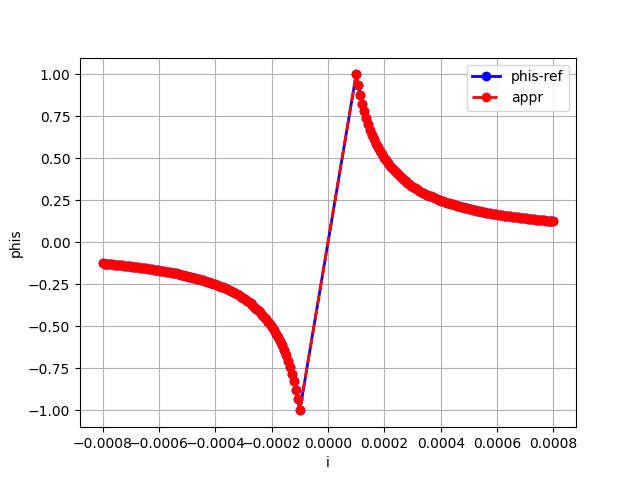

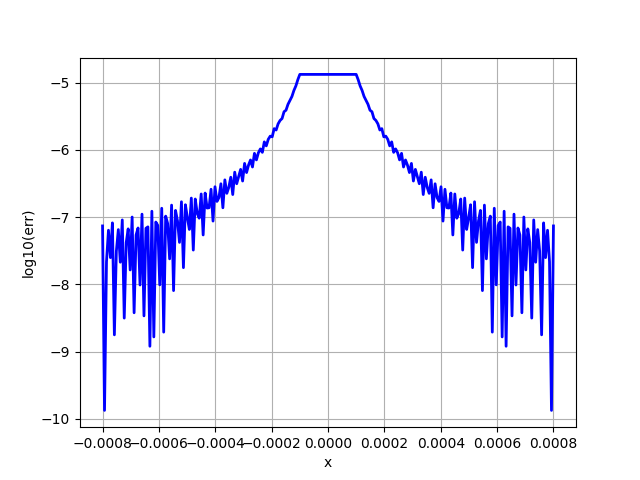

Done.


In [10]:
# ---------------------------------------------------------------------------------
# --- RECHECK: Compute the inverse function using the sequence of 2x2 rotations ---
# ---------------------------------------------------------------------------------
mix.reload_module(eqsvt)

print("1/kappa: {:0.3e}".format(1./kappa_goal_))
eqsvt.construct_inverse_function_GPU(
    phis_in = np.array(phis_appr_),
    kappa     = kappa_goal_, 
    coef_norm = coef_norm_,
    opt_domain = 2
)
print("Done.")